### Deaths Counts due to Various Diseases

In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from pprint import pprint
from scipy.stats import linregress
from scipy.optimize import curve_fit

In [2]:
file= pd.read_csv("death_by_disease.csv")

In [3]:
death_cause= pd.DataFrame(file)
death_cause

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),...,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke,flag_cov19mcod,flag_cov19ucod
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,NaN,0.0,...,NaN,NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),NaN,NaN,Suppressed (counts 1-9),NaN,NaN
1,2019,1,United States,15-24 years,2340.0,626.0,NaN,123.0,31.0,0.0,...,NaN,NaN,NaN,NaN,Suppressed (counts 1-9),NaN,NaN,NaN,NaN,NaN
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,2021,3,10,5-14 years,14.0,NaN,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Suppressed (counts 1-9),NaN,NaN
2966,2021,3,10,55-64 years,1182.0,1100.0,NaN,357.0,38.0,NaN,...,Suppressed (counts 1-9),Suppressed (counts 1-9),NaN,NaN,Suppressed (counts 1-9),NaN,NaN,NaN,NaN,NaN
2967,2021,3,10,65-74 years,1984.0,1895.0,NaN,608.0,87.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2968,2021,3,10,75-84 years,2427.0,2333.0,26.0,590.0,89.0,152.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
death_updated=death_cause.drop(columns=['flag_allcause','flag_natcause','flag_sept','flag_neopl',
                                        'flag_diab','flag_alz','flag_inflpn','flag_clrd','flag_otherresp',
                                        'flag_nephr','flag_otherunk','flag_hd','flag_stroke','flag_cov19mcod',
                                        'flag_cov19ucod'])
death_updated

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),...,Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",AnalysisDate,Note
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,NaN,0.0,...,NaN,27.0,NaN,217.0,34.0,NaN,0.0,0.0,4/23/2021,NaN
1,2019,1,United States,15-24 years,2340.0,626.0,NaN,123.0,31.0,0.0,...,11.0,14.0,NaN,38.0,71.0,18.0,0.0,0.0,4/23/2021,NaN
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,...,24.0,29.0,27.0,67.0,285.0,46.0,0.0,0.0,4/23/2021,NaN
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,...,64.0,53.0,70.0,82.0,886.0,131.0,0.0,0.0,4/23/2021,NaN
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,...,352.0,149.0,221.0,120.0,2750.0,479.0,0.0,0.0,4/23/2021,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,2021,3,10,5-14 years,14.0,NaN,0.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,4/23/2021,NaN
2966,2021,3,10,55-64 years,1182.0,1100.0,NaN,357.0,38.0,NaN,...,55.0,18.0,NaN,70.0,171.0,37.0,42.0,35.0,4/23/2021,NaN
2967,2021,3,10,65-74 years,1984.0,1895.0,NaN,608.0,87.0,30.0,...,123.0,28.0,12.0,52.0,391.0,82.0,74.0,56.0,4/23/2021,NaN
2968,2021,3,10,75-84 years,2427.0,2333.0,26.0,590.0,89.0,152.0,...,152.0,48.0,23.0,29.0,462.0,143.0,101.0,83.0,4/23/2021,NaN


In [5]:
death_updated[death_updated["Note"].str.contains("Data are provisional, and values in the most recent months are incomplete.")==False]
death_updated

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),...,Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",AnalysisDate,Note
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,NaN,0.0,...,NaN,27.0,NaN,217.0,34.0,NaN,0.0,0.0,4/23/2021,NaN
1,2019,1,United States,15-24 years,2340.0,626.0,NaN,123.0,31.0,0.0,...,11.0,14.0,NaN,38.0,71.0,18.0,0.0,0.0,4/23/2021,NaN
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,...,24.0,29.0,27.0,67.0,285.0,46.0,0.0,0.0,4/23/2021,NaN
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,...,64.0,53.0,70.0,82.0,886.0,131.0,0.0,0.0,4/23/2021,NaN
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,...,352.0,149.0,221.0,120.0,2750.0,479.0,0.0,0.0,4/23/2021,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,2021,3,10,5-14 years,14.0,NaN,0.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,4/23/2021,NaN
2966,2021,3,10,55-64 years,1182.0,1100.0,NaN,357.0,38.0,NaN,...,55.0,18.0,NaN,70.0,171.0,37.0,42.0,35.0,4/23/2021,NaN
2967,2021,3,10,65-74 years,1984.0,1895.0,NaN,608.0,87.0,30.0,...,123.0,28.0,12.0,52.0,391.0,82.0,74.0,56.0,4/23/2021,NaN
2968,2021,3,10,75-84 years,2427.0,2333.0,26.0,590.0,89.0,152.0,...,152.0,48.0,23.0,29.0,462.0,143.0,101.0,83.0,4/23/2021,NaN


In [6]:
death_updated["Note"].nunique()

1

In [7]:
del death_updated['Note']
death_updated.fillna(0, inplace =True)
death_updated.head()

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",AnalysisDate
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,0.0,0.0,31.0,0.0,27.0,0.0,217.0,34.0,0.0,0.0,0.0,4/23/2021
1,2019,1,United States,15-24 years,2340.0,626.0,0.0,123.0,31.0,0.0,18.0,11.0,14.0,0.0,38.0,71.0,18.0,0.0,0.0,4/23/2021
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,55.0,24.0,29.0,27.0,67.0,285.0,46.0,0.0,0.0,4/23/2021
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,120.0,64.0,53.0,70.0,82.0,886.0,131.0,0.0,0.0,4/23/2021
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,285.0,352.0,149.0,221.0,120.0,2750.0,479.0,0.0,0.0,4/23/2021


In [8]:
dict = {'Septicemia (A40-A41)': 'Septicemia',
        'Malignant neoplasms (C00-C97)': 'Malignant_neoplasms',
        'Diabetes mellitus (E10-E14)': 'Diabetes_mellitus',
        'Alzheimer disease (G30)': 'Alzheimer_disease',
        'Influenza and pneumonia (J09-J18)': 'Influenza_pneumonia',
        'Chronic lower respiratory diseases (J40-J47)': 'Chronic_lower_respiratory_diseases',
        'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)': 'Other_diseases_of_respiratory_system',
        'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)': 'Nephritis',
        'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)':'Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
        'Diseases of heart (I00-I09,I11,I13,I20-I51)':'Diseases_of_heart',
        'Cerebrovascular diseases (I60-I69)':'Cerebrovascular_diseases',
        'COVID-19 (U071, Multiple Cause of Death)':'COVID-19_Multiple_Cause_of_Death',
        'COVID-19 (U071, Underlying Cause of Death)':'COVID-19_Underlying_Cause_of_Death',
        'AnalysisDate':'AnalysisDate'
       }

death_updated.rename(columns=dict,
          inplace=True)

death_updated

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia,Malignant_neoplasms,Diabetes_mellitus,Alzheimer_disease,Influenza_pneumonia,Chronic_lower_respiratory_diseases,Other_diseases_of_respiratory_system,Nephritis,Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified,Diseases_of_heart,Cerebrovascular_diseases,COVID-19_Multiple_Cause_of_Death,COVID-19_Underlying_Cause_of_Death,AnalysisDate
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,0.0,0.0,31.0,0.0,27.0,0.0,217.0,34.0,0.0,0.0,0.0,4/23/2021
1,2019,1,United States,15-24 years,2340.0,626.0,0.0,123.0,31.0,0.0,18.0,11.0,14.0,0.0,38.0,71.0,18.0,0.0,0.0,4/23/2021
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,55.0,24.0,29.0,27.0,67.0,285.0,46.0,0.0,0.0,4/23/2021
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,120.0,64.0,53.0,70.0,82.0,886.0,131.0,0.0,0.0,4/23/2021
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,285.0,352.0,149.0,221.0,120.0,2750.0,479.0,0.0,0.0,4/23/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,2021,3,10,5-14 years,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4/23/2021
2966,2021,3,10,55-64 years,1182.0,1100.0,0.0,357.0,38.0,0.0,0.0,55.0,18.0,0.0,70.0,171.0,37.0,42.0,35.0,4/23/2021
2967,2021,3,10,65-74 years,1984.0,1895.0,0.0,608.0,87.0,30.0,12.0,123.0,28.0,12.0,52.0,391.0,82.0,74.0,56.0,4/23/2021
2968,2021,3,10,75-84 years,2427.0,2333.0,26.0,590.0,89.0,152.0,19.0,152.0,48.0,23.0,29.0,462.0,143.0,101.0,83.0,4/23/2021


In [9]:
death_updated.columns

Index(['Date Of Death Year', 'Date Of Death Month', 'HHSRegion', 'AgeGroup',
       'AllCause', 'NaturalCause', 'Septicemia', 'Malignant_neoplasms',
       'Diabetes_mellitus', 'Alzheimer_disease', 'Influenza_pneumonia',
       'Chronic_lower_respiratory_diseases',
       'Other_diseases_of_respiratory_system', 'Nephritis',
       'Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
       'Diseases_of_heart', 'Cerebrovascular_diseases',
       'COVID-19_Multiple_Cause_of_Death',
       'COVID-19_Underlying_Cause_of_Death', 'AnalysisDate'],
      dtype='object')

In [10]:
age_death_total = death_updated[death_updated["HHSRegion"].str.contains("United States")==True]
age_death_total

age_death_total = age_death_total[['AgeGroup',
       'AllCause', 'NaturalCause', 'Septicemia', 'Malignant_neoplasms',
       'Diabetes_mellitus', 'Alzheimer_disease', 'Influenza_pneumonia',
       'Chronic_lower_respiratory_diseases',
       'Other_diseases_of_respiratory_system', 'Nephritis',
       'Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
       'Diseases_of_heart', 'Cerebrovascular_diseases',
       'COVID-19_Multiple_Cause_of_Death',
       'COVID-19_Underlying_Cause_of_Death']]

age_death_total_grouped = age_death_total.groupby(["AgeGroup"]).sum()
age_death_total_grouped.columns=["Number of Deaths from All Causes",
                                "Number of Deaths from Natural Causes",
                                "Number of Deaths from Septicemia",
                                "Number of Deaths from Malignant Neoplasms",
                                "Number of Deaths from Diabetes Mellitus",
                                "Number of Deaths from Alzheimer Disease",
                                "Number of Deaths from Influenza Pneumonia",
                                "Number of Deaths from Chronic Lower Respiratory Diseases",
                                "Number of Deaths from Other diseases of respiratory_system",
                                "Number of Deaths from Nephritis",
                                "Number of Deaths from Symptoms signs abnormal clinical laboratory findings not elsewhere classified",
                                "Number of Deaths from Diseases of heart",
                                "Number of Deaths from Cerebrovascular diseases",
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)",
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)",
                              ]
age_death_total_df= age_death_total_grouped.reindex(["0-4 years","5-14 years","15-24 years",
                                   "25-34 years",'35-44 years','45-54 years','55-64 years',
                                   '65-74 years',"75-84 years",'85 years and over'])
age_death_total_df

,Number of Deaths from All Causes,Number of Deaths from Natural Causes,Number of Deaths from Septicemia,Number of Deaths from Malignant Neoplasms,Number of Deaths from Diabetes Mellitus,Number of Deaths from Alzheimer Disease,Number of Deaths from Influenza Pneumonia,Number of Deaths from Chronic Lower Respiratory Diseases,Number of Deaths from Other diseases of respiratory_system,Number of Deaths from Nephritis,Number of Deaths from Symptoms signs abnormal clinical laboratory findings not elsewhere classified,Number of Deaths from Diseases of heart,Number of Deaths from Cerebrovascular diseases,Number of Deaths from COVID-19 (Multiple Causes of Death),Number of Deaths from COVID-19 (Underlying Causes of Death)
AgeGroup,,,,,,,,,,,,,,,
0-4 years,52218.0,45631.0,364.0,796.0,0.0,0.0,429.0,0.0,586.0,12.0,6431.0,813.0,312.0,36.0,11.0
5-14 years,12322.0,6637.0,10.0,1755.0,0.0,0.0,174.0,258.0,10.0,0.0,364.0,362.0,41.0,48.0,20.0
15-24 years,73650.0,17539.0,124.0,3005.0,610.0,0.0,316.0,412.0,234.0,21.0,3071.0,1897.0,347.0,824.0,682.0
25-34 years,149826.0,54817.0,855.0,8007.0,2279.0,0.0,1121.0,844.0,622.0,689.0,7309.0,8273.0,1333.0,3638.0,3210.0
35-44 years,213353.0,125997.0,2027.0,23973.0,5756.0,0.0,2282.0,1597.0,1388.0,1861.0,8663.0,25084.0,4215.0,9461.0,8590.0
45-54 years,400070.0,319821.0,5218.0,77960.0,15530.0,144.0,5022.0,7768.0,3570.0,5186.0,9606.0,72399.0,12126.0,26403.0,24515.0
55-64 years,928719.0,845275.0,13470.0,246679.0,37788.0,2999.0,12793.0,41230.0,11061.0,13546.0,13507.0,188750.0,30542.0,67126.0,62281.0
65-74 years,1409190.0,1353378.0,20821.0,386950.0,56794.0,19270.0,21200.0,86151.0,22820.0,25286.0,12747.0,289472.0,56970.0,120922.0,112116.0
75-84 years,1722831.0,1671088.0,23408.0,360785.0,53858.0,79951.0,29093.0,110674.0,30928.0,33142.0,13824.0,365575.0,94501.0,151828.0,138371.0


In [11]:
death_month_gb= death_updated.groupby(['Date Of Death Month']).mean()
death_month_gb

,Date Of Death Year,AllCause,NaturalCause,Septicemia,Malignant_neoplasms,Diabetes_mellitus,Alzheimer_disease,Influenza_pneumonia,Chronic_lower_respiratory_diseases,Other_diseases_of_respiratory_system,Nephritis,Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified,Diseases_of_heart,Cerebrovascular_diseases,COVID-19_Multiple_Cause_of_Death,COVID-19_Underlying_Cause_of_Death
Date Of Death Month,,,,,,,,,,,,,,,,
1,2020.0,5324.127273,4942.372727,64.230303,933.993939,157.166667,207.303030,99.321212,259.918182,75.309091,87.851515,81.472727,1109.787879,253.554545,602.766667,551.587879
2,2020.0,4510.954545,4175.712121,58.172727,843.366667,138.406061,181.439394,89.212121,231.469697,66.169697,77.369697,90.742424,989.427273,225.418182,274.969697,243.527273
3,2020.0,4614.200000,4277.724242,60.584848,896.184848,141.190909,187.709091,100.554545,244.439394,71.284848,79.927273,117.036364,1021.054545,237.424242,165.787879,145.251515
4,2019.5,5073.931818,4695.209091,59.204545,884.009091,151.995455,200.754545,93.863636,249.563636,69.459091,78.940909,49.268182,1066.286364,234.495455,593.072727,561.318182
5,2019.5,4708.113636,4287.722727,55.118182,905.618182,140.931818,185.254545,65.940909,230.754545,63.781818,75.295455,47.218182,1014.572727,226.654545,346.909091,319.350000
6,2019.5,4329.954545,3909.763636,52.795455,877.827273,131.022727,175.150000,56.986364,210.690909,60.045455,72.240909,46.445455,957.313636,216.268182,162.640909,142.986364
7,2019.5,4624.309091,4181.713636,55.200000,914.872727,140.413636,185.400000,57.177273,213.704545,59.795455,75.245455,51.931818,995.840909,225.536364,281.536364,256.045455
8,2019.5,4590.081818,4152.877273,55.318182,924.113636,135.318182,184.990909,55.836364,207.459091,60.031818,73.359091,52.727273,978.054545,225.695455,270.186364,244.495455
9,2019.5,4365.318182,3954.154545,54.631818,896.240909,131.686364,179.604545,53.318182,201.859091,59.413636,70.750000,49.640909,945.204545,222.304545,172.722727,152.209091


In [12]:
t = np.array(death_month_gb.index)
data = np.array(death_month_gb.Influenza_pneumonia)

In [13]:
t2 = np.array(death_month_gb.index)
data2 = np.array(death_month_gb['COVID-19_Underlying_Cause_of_Death'])

In [14]:
# # fit a straight line to the economic data
# from numpy import arange
# from pandas import read_csv
# from scipy.optimize import curve_fit
# from matplotlib import pyplot

# # define the true objective function
# def objective(x, a, b):
#     return a * x + b

# # load the dataset
# url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
# dataframe = read_csv(url, header=None)
# data = dataframe.values
# # choose the input and output variables
# x, y = data[:, 4], data[:, -1]
# # curve fit
# popt, _ = curve_fit(objective, x, y)
# # summarize the parameter values
# a, b = popt
# print('y = %.5f * x + %.5f' % (a, b))
# # plot input vs output
# pyplot.scatter(x, y)
# # define a sequence of inputs between the smallest and largest known inputs
# x_line = arange(min(x), max(x), 1)
# # calculate the output for the range
# y_line = objective(x_line, a, b)
# # create a line plot for the mapping function
# pyplot.plot(x_line, y_line, '--', color='red')
# pyplot.show()

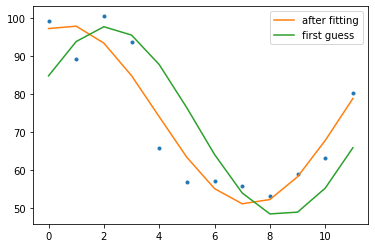

In [46]:
import numpy as np
from scipy.optimize import curve_fit
import pylab as plt

# N = 1000 # number of data points
# t = np.linspace(0, 4*np.pi, N)
# data = 3.0*np.sin(t+0.001) + 0.5 + np.random.randn(N) # create artificial data with noise



guess_freq = 0.5
guess_amplitude = 2*np.std(data)/(2**0.5)
guess_phase = 0
guess_offset = np.mean(data)

p0=[guess_freq, guess_amplitude,
    guess_phase, guess_offset]

# create the function we want to fit
def my_sin(x, freq, amplitude, phase, offset):
    return np.sin(x * freq + phase) * amplitude + offset

# sin(x * 0.5 * 0) * 2*np.std(data)/(2**0.5) + np.mean(data)

# now do the fit
fit = curve_fit(my_sin, t, data, p0=p0)

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = my_sin(t, *p0)

# recreate the fitted curve using the optimized parameters
data_fit = my_sin(t, *fit[0])

plt.plot(data, '.')
plt.plot(data_fit, label='after fitting')
plt.plot(data_first_guess, label='first guess')
plt.legend()
plt.show()

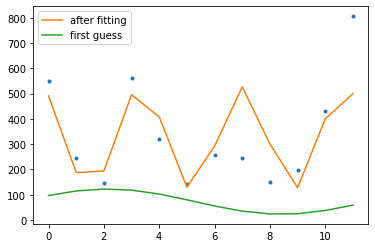

In [16]:
import numpy as np
from scipy.optimize import curve_fit
import pylab as plt

# N = 1000 # number of data points
# t = np.linspace(0, 4*np.pi, N)
# data = 3.0*np.sin(t+0.001) + 0.5 + np.random.randn(N) # create artificial data with noise



guess_freq = 0.5
guess_amplitude = 4*np.std(data)/(2**0.5)
guess_phase = 0
guess_offset = np.mean(data)

p0=[guess_freq, guess_amplitude,
    guess_phase, guess_offset]

# create the function we want to fit
def my_sin(x, freq, amplitude, phase, offset):
    return np.sin(x * freq + phase) * amplitude + offset

# sin(x * 0.5 * 0) * 2*np.std(data)/(2**0.5) + np.mean(data)

# now do the fit
fit = curve_fit(my_sin, t2, data2, p0=p0)

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = my_sin(t2, *p0)

# recreate the fitted curve using the optimized parameters
data_fit = my_sin(t2, *fit[0])

plt.plot(data2, '.')
plt.plot(data_fit, label='after fitting')
plt.plot(data_first_guess, label='first guess')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Date Of Death Month'>

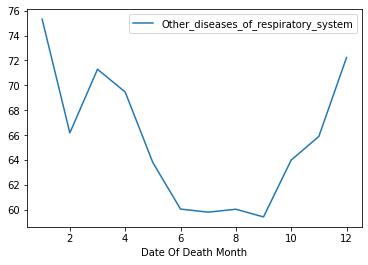

In [17]:
d_mod = death_month_gb.reset_index()
d_mod.plot.line(x='Date Of Death Month', y='Other_diseases_of_respiratory_system')

<AxesSubplot:xlabel='Date Of Death Month'>

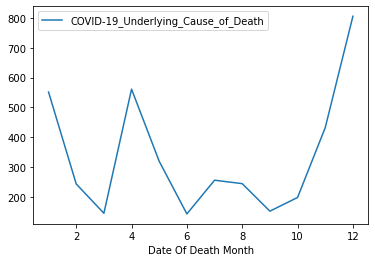

In [18]:
# x_val=np.array(list(death_month_gb.index))

d_mod = death_month_gb.reset_index()
d_mod.plot.line(x='Date Of Death Month', y='COVID-19_Underlying_Cause_of_Death')


<AxesSubplot:xlabel='Date Of Death Month'>

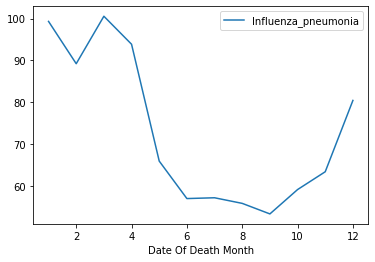

In [19]:
d_mod = death_month_gb.reset_index()
d_mod.plot.line(x='Date Of Death Month', y='Influenza_pneumonia')

In [20]:
#The average number of deaths per month due to Influenza per age group
age_death_total.groupby(["AgeGroup"])['Influenza_pneumonia'].mean()

AgeGroup
0-4 years              15.888889
15-24 years            11.703704
25-34 years            41.518519
35-44 years            84.518519
45-54 years           186.000000
5-14 years              6.444444
55-64 years           473.814815
65-74 years           785.185185
75-84 years          1077.518519
85 years and over    1529.629630
Name: Influenza_pneumonia, dtype: float64

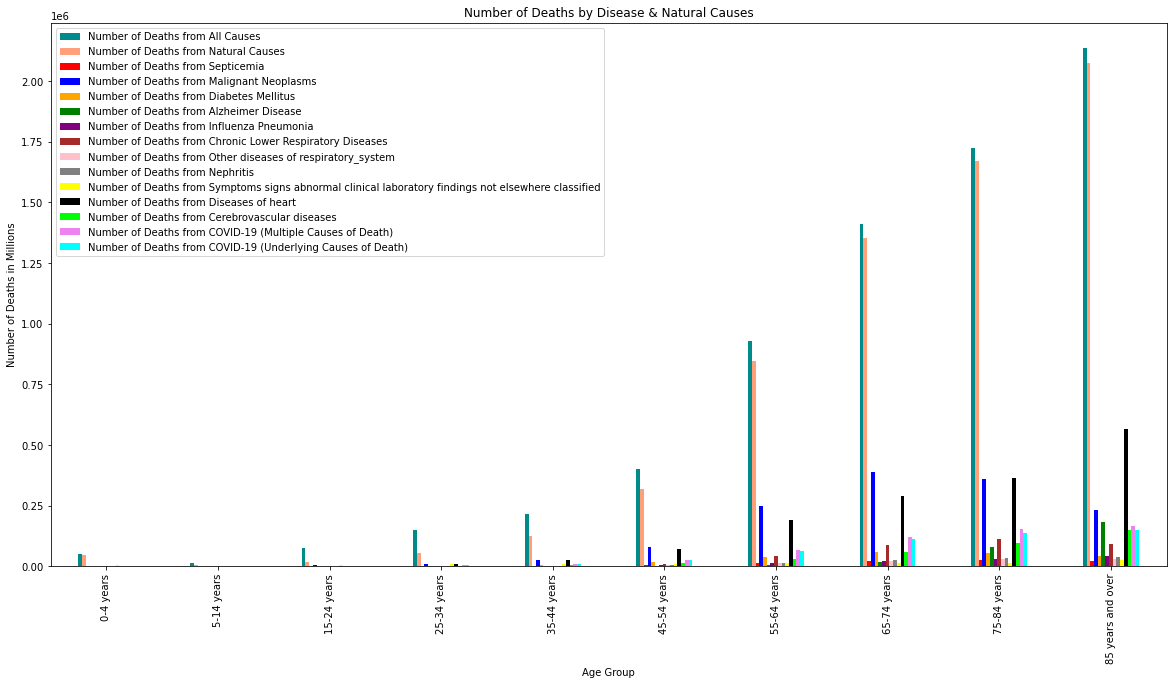

In [21]:
age_death_total_df.plot.bar(title="Age Death", figsize=(20,10), color= ['darkcyan','lightsalmon',"red", "blue", 'orange', 'green', 'purple', 'brown', 'pink', 'gray',
                                          'yellow', 'black', 'lime', 'violet', 'cyan'])


plt.title("Number of Deaths by Disease & Natural Causes")
plt.xlabel("Age Group")
plt.ylabel("Number of Deaths in Millions")

label=["Causes of Death"]


Text(0, 0.5, 'Number of Deaths in Thousands')

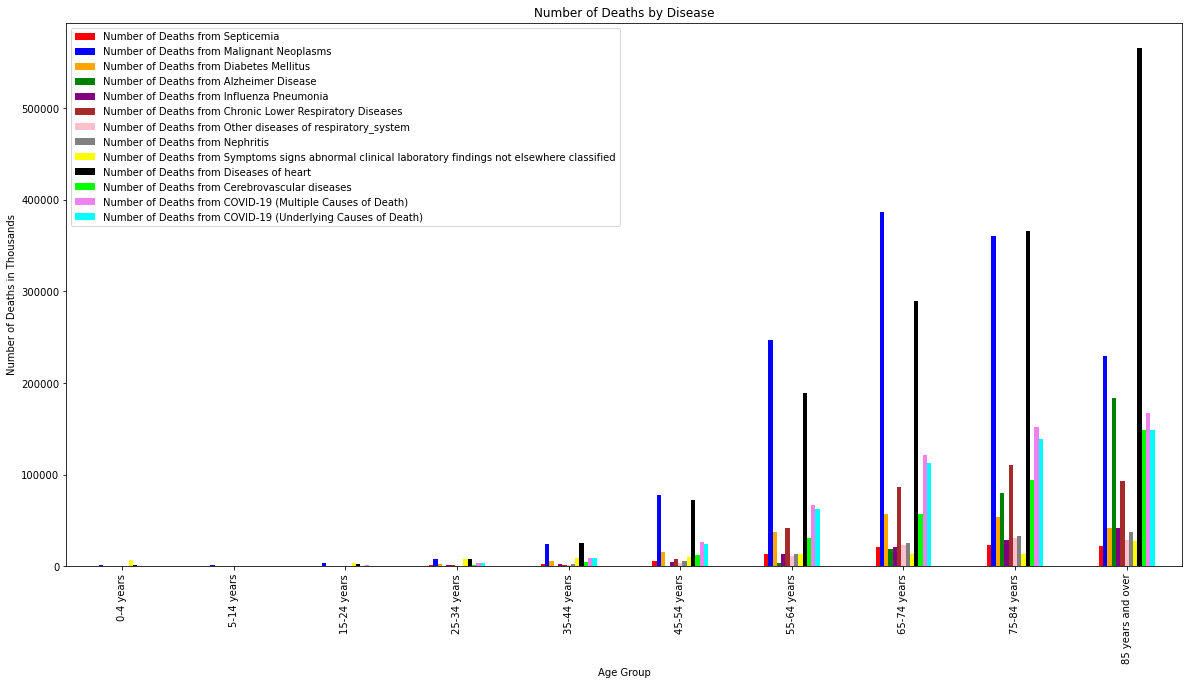

In [22]:
bar1_df = age_death_total_df[["Number of Deaths from Septicemia",
                                "Number of Deaths from Malignant Neoplasms",
                                "Number of Deaths from Diabetes Mellitus",
                                "Number of Deaths from Alzheimer Disease",
                                "Number of Deaths from Influenza Pneumonia",
                                "Number of Deaths from Chronic Lower Respiratory Diseases",
                                "Number of Deaths from Other diseases of respiratory_system",
                                "Number of Deaths from Nephritis",
                                "Number of Deaths from Symptoms signs abnormal clinical laboratory findings not elsewhere classified",
                                "Number of Deaths from Diseases of heart",
                                "Number of Deaths from Cerebrovascular diseases",
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)",
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)"]]


bar1_df.plot.bar(figsize=(20,10), color= ["red", "blue", 'orange', 'green', 'purple', 'brown', 'pink', 'gray',
                                          'yellow', 'black', 'lime', 'violet', 'cyan'])

plt.title("Number of Deaths by Disease")
plt.xlabel("Age Group")
plt.ylabel("Number of Deaths in Thousands")

Text(0, 0.5, 'Number of Deaths in Thousands')

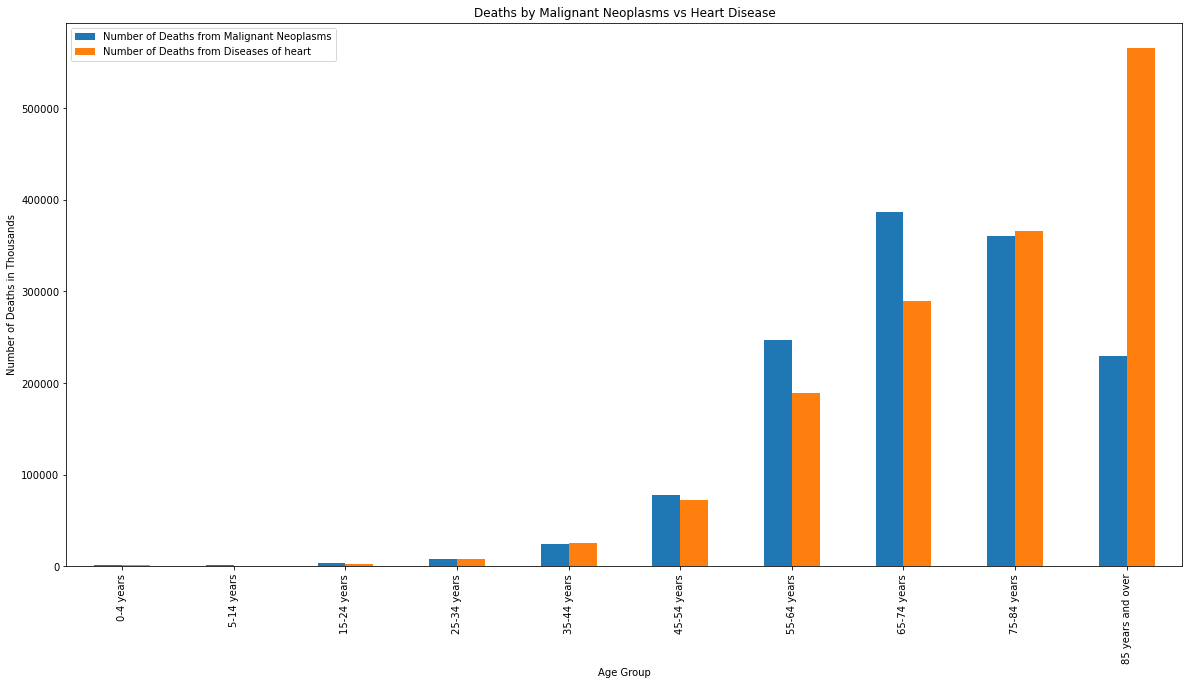

In [59]:
bar_df = age_death_total_df[["Number of Deaths from Malignant Neoplasms",
                             "Number of Deaths from Diseases of heart",
                            ]]

bar_df.plot.bar(figsize=(20,10))
plt.title("Deaths by Malignant Neoplasms vs Heart Disease")
plt.xlabel("Age Group")
plt.ylabel("Number of Deaths in Thousands")

Text(0, 0.5, 'Number of Deaths in Millions')

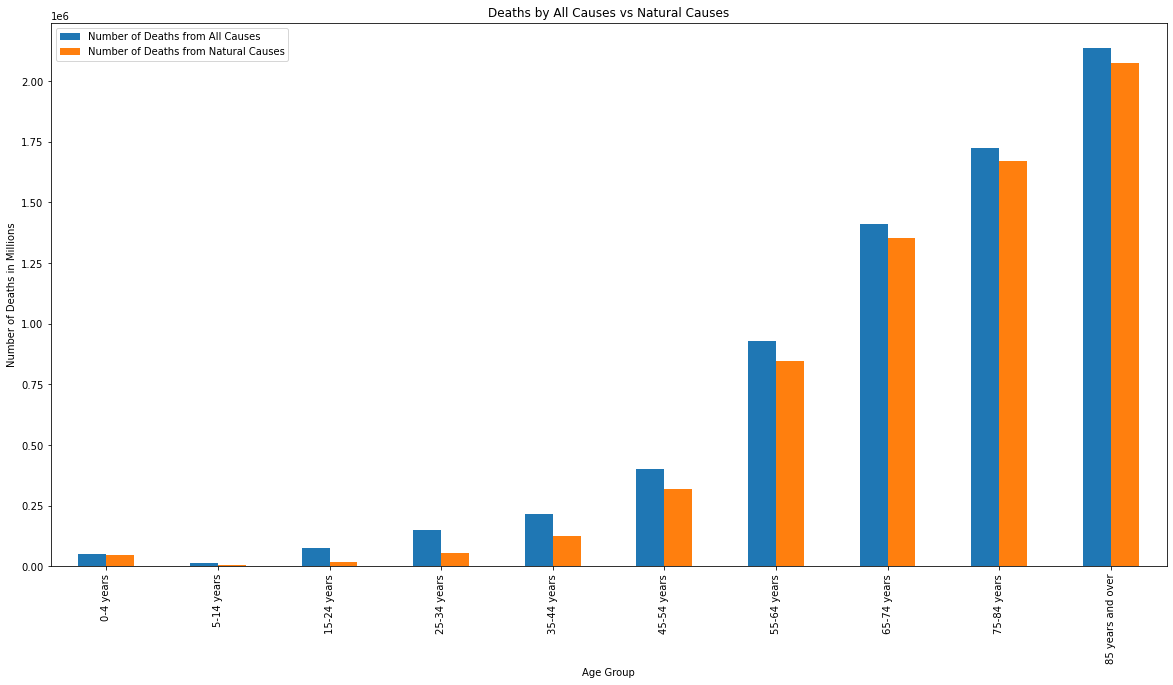

In [23]:
bar_df = age_death_total_df[["Number of Deaths from All Causes",
                                "Number of Deaths from Natural Causes",
                            ]]

bar_df.plot.bar(figsize=(20,10))
plt.title("Deaths by All Causes vs Natural Causes")
plt.xlabel("Age Group")
plt.ylabel("Number of Deaths in Millions")

Text(0, 0.5, 'Number of Deaths in Thousands')

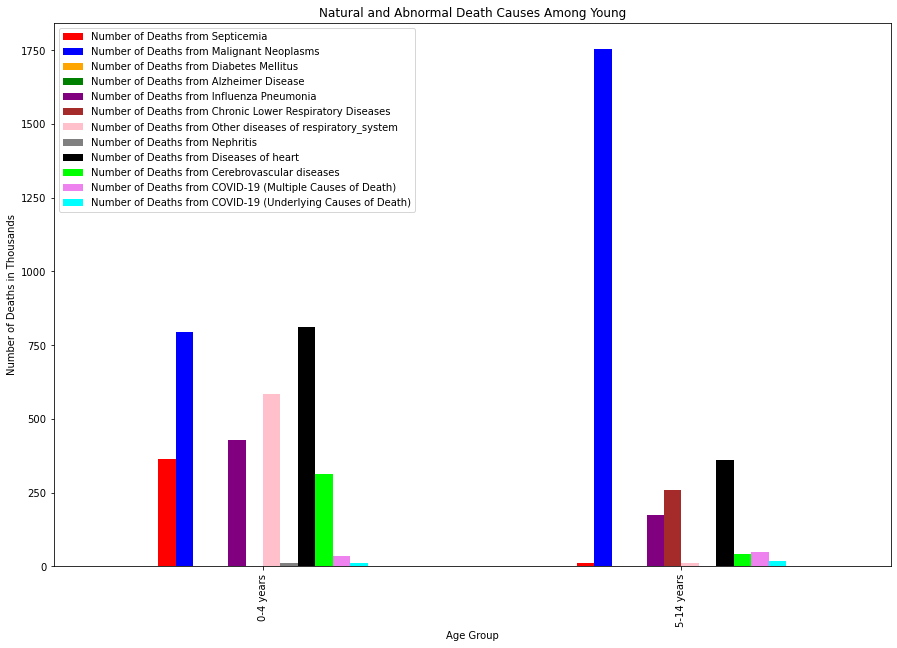

In [65]:
young_age = age_death_total_df.iloc[0:2]
young_age
young_age_df = young_age[["Number of Deaths from Septicemia",
                                "Number of Deaths from Malignant Neoplasms",
                                "Number of Deaths from Diabetes Mellitus",
                                "Number of Deaths from Alzheimer Disease",
                                "Number of Deaths from Influenza Pneumonia",
                                "Number of Deaths from Chronic Lower Respiratory Diseases",
                                "Number of Deaths from Other diseases of respiratory_system",
                                "Number of Deaths from Nephritis",
                                "Number of Deaths from Diseases of heart",
                                "Number of Deaths from Cerebrovascular diseases",
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)",
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)"]]
                            

young_age_df.plot.bar(figsize=(15,10), color= ["red", "blue", 'orange', 'green', 'purple', 'brown', 'pink', 'gray',
                                               'black', 'lime', 'violet', 'cyan'])
plt.title("Natural and Abnormal Death Causes Among Young")
plt.xlabel("Age Group")
plt.ylabel("Number of Deaths in Thousands")

In [ ]:
bar_df = age_death_total_df[["Number of Deaths from All Causes",
                                "Number of Deaths from Natural Causes",
                            ]]

bar_df.plot.bar(figsize=(20,10))
plt.title("Deaths by All Causes vs Natural Causes")
plt.xlabel("Age Group")
plt.ylabel("Number of Deaths in Millions")

Text(0, 0.5, 'Number of Deaths in Thousands')

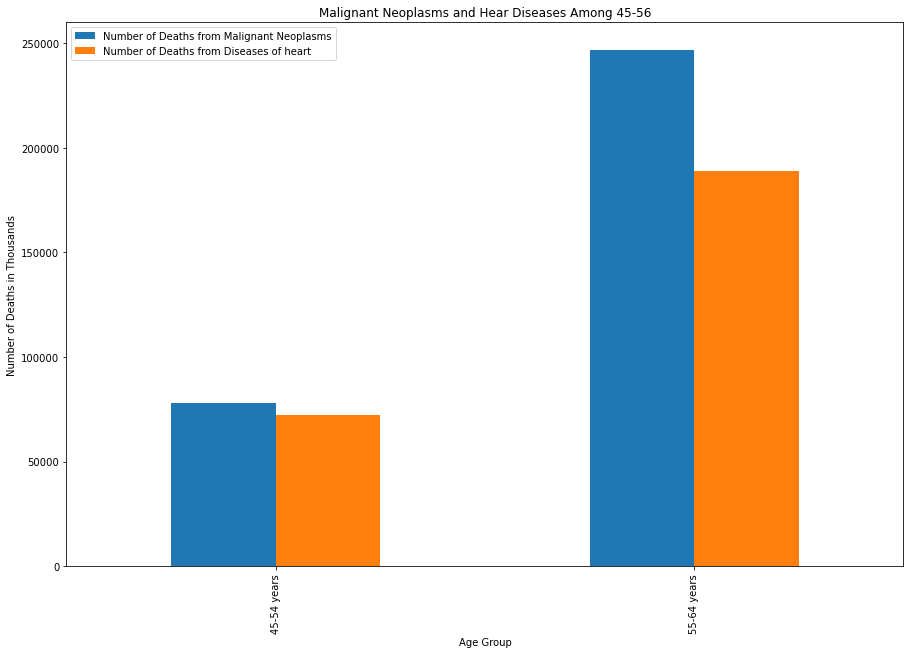

In [48]:
mid_age = age_death_total_df.iloc[5:7]
mid_age
mid_df = mid_age[["Number of Deaths from Malignant Neoplasms",
                           "Number of Deaths from Diseases of heart",]]
                            

mid_df.plot.bar(figsize=(15,10), ylim=(0, 260000))
plt.title("Malignant Neoplasms and Hear Diseases Among 45-56")
plt.xlabel("Age Group")
plt.ylabel("Number of Deaths in Thousands")

Text(0, 0.5, 'Number of Deaths in Thousands')

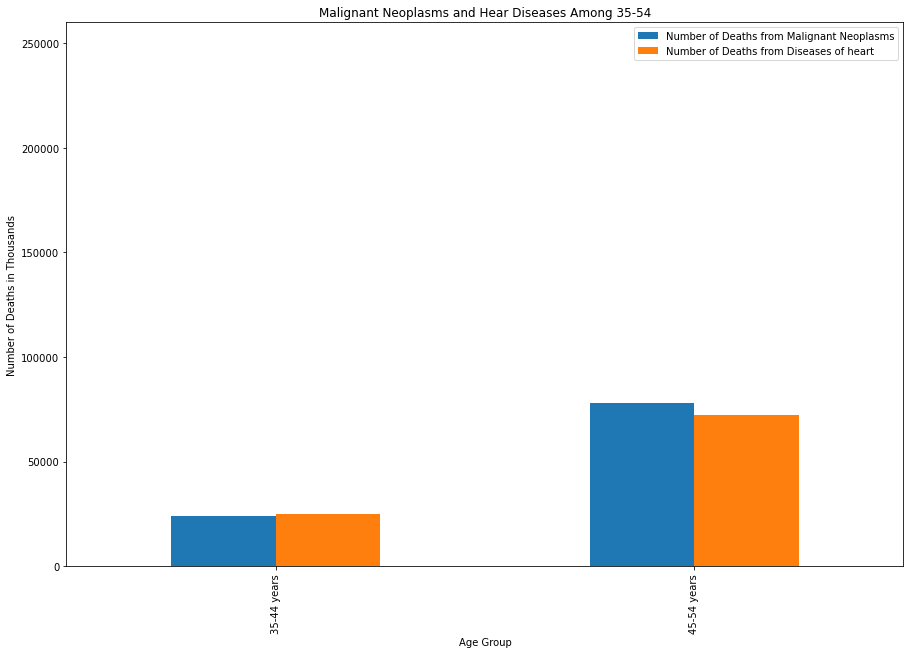

In [26]:
mid_age = age_death_total_df.iloc[4:6]
mid_age
mid_df = mid_age[["Number of Deaths from Malignant Neoplasms",
                           "Number of Deaths from Diseases of heart",]]
                            

mid_df.plot.bar(figsize=(15,10), ylim=(0,260000))
plt.title("Malignant Neoplasms and Hear Diseases Among 35-54")
plt.xlabel("Age Group")
plt.ylabel("Number of Deaths in Thousands")


Text(0, 0.5, 'Number of Deaths in Thousands')

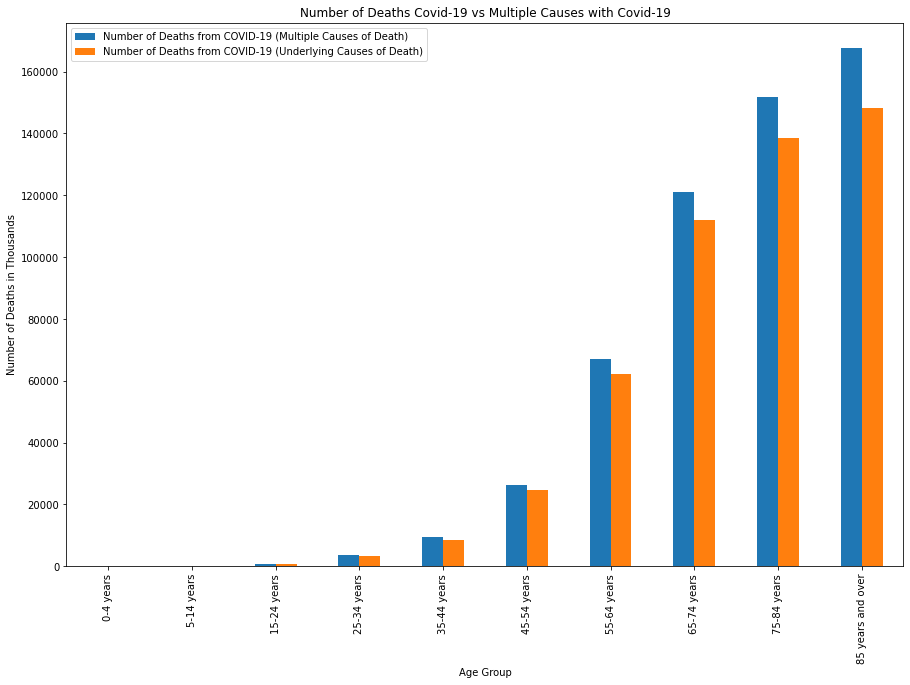

In [27]:
covidbar_df = age_death_total_df[["Number of Deaths from COVID-19 (Multiple Causes of Death)",
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)",
                            ]]

covidbar_df.plot.bar(figsize=(15,10))
plt.title("Number of Deaths Covid-19 vs Multiple Causes with Covid-19")
plt.xlabel("Age Group")
plt.ylabel("Number of Deaths in Thousands")

In [28]:
def create_bar_chart(y_val, ylabel, title):
    # Generate a bar plot showing the total number of Deaths from all causes
    x_axis = age_death_total_df.index

    #plt.figure(figsize=(6.25,4.25))


    plt.bar(x_axis, age_death_total_df[y_val])
    plt.xticks(rotation ='vertical')

    # plt.xlim(-0.5, len(x_axis)-.5)
    # plt.ylim(0, max(timepoints["Drug Regimen"])*1.05)

    plt.title(title)
    plt.xlabel("Age Range")
    plt.ylabel(ylabel)

    label=["Count of Deaths"]
    plt.legend(label, loc = "upper center")

    # plt.tight_layout()

    plt.show()

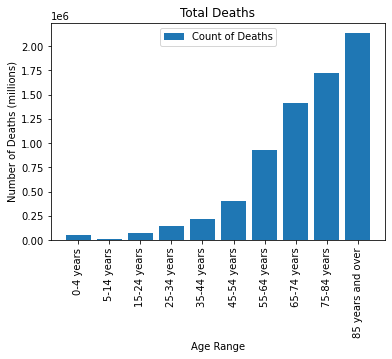

In [29]:
create_bar_chart("Number of Deaths from All Causes","Number of Deaths (millions)", "Total Deaths")

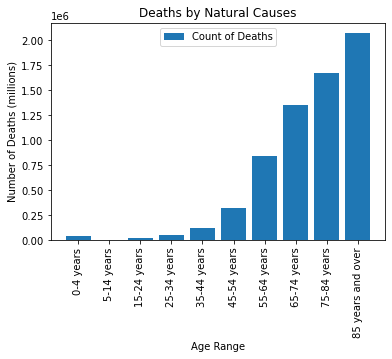

In [30]:
create_bar_chart("Number of Deaths from Natural Causes","Number of Deaths (millions)", "Deaths by Natural Causes")

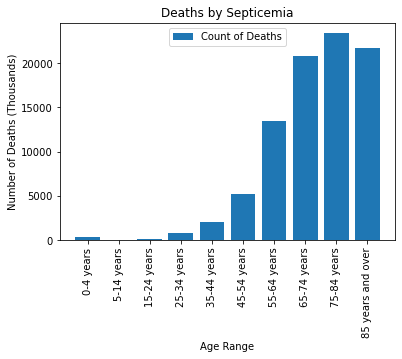

In [31]:
create_bar_chart("Number of Deaths from Septicemia","Number of Deaths (Thousands)", "Deaths by Septicemia")

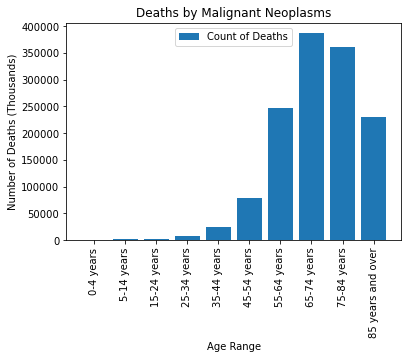

In [32]:
create_bar_chart("Number of Deaths from Malignant Neoplasms","Number of Deaths (Thousands)", "Deaths by Malignant Neoplasms")

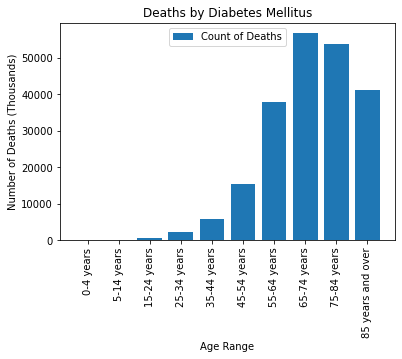

In [33]:
create_bar_chart("Number of Deaths from Diabetes Mellitus","Number of Deaths (Thousands)", "Deaths by Diabetes Mellitus")

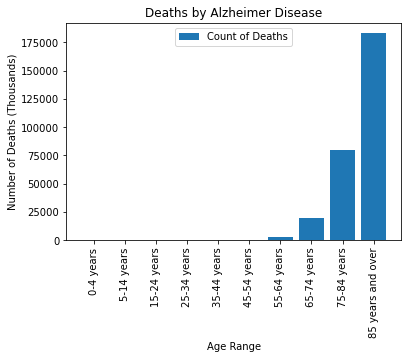

In [34]:
create_bar_chart("Number of Deaths from Alzheimer Disease","Number of Deaths (Thousands)", "Deaths by Alzheimer Disease")

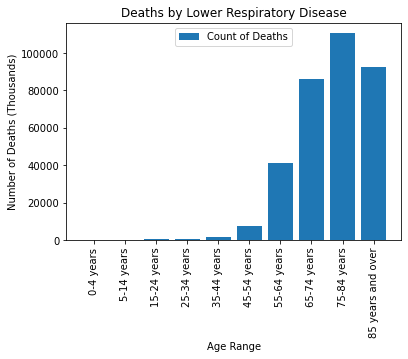

In [35]:
create_bar_chart("Number of Deaths from Chronic Lower Respiratory Diseases","Number of Deaths (Thousands)", "Deaths by Lower Respiratory Disease")

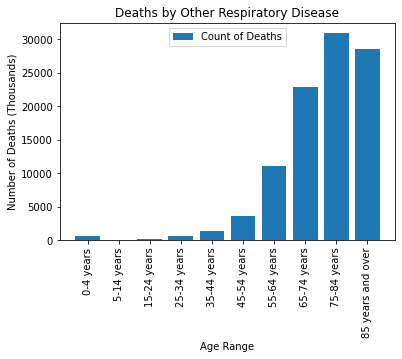

In [36]:
create_bar_chart("Number of Deaths from Other diseases of respiratory_system","Number of Deaths (Thousands)", "Deaths by Other Respiratory Disease")

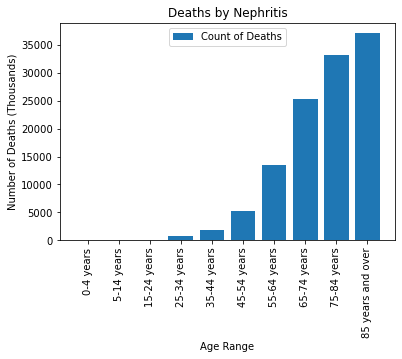

In [37]:
create_bar_chart("Number of Deaths from Nephritis","Number of Deaths (Thousands)", "Deaths by Nephritis")

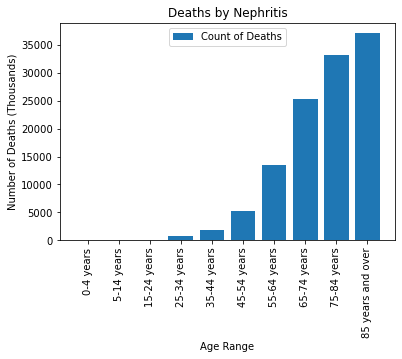

In [38]:
create_bar_chart("Number of Deaths from Nephritis","Number of Deaths (Thousands)","Deaths by Nephritis")

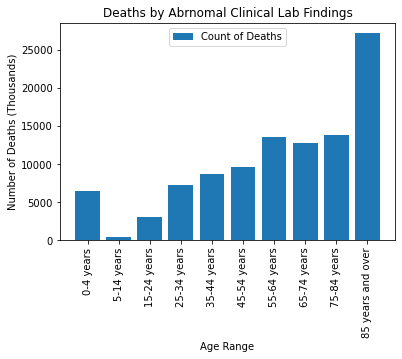

In [39]:
create_bar_chart("Number of Deaths from Symptoms signs abnormal clinical laboratory findings not elsewhere classified","Number of Deaths (Thousands)", "Deaths by Abrnomal Clinical Lab Findings")

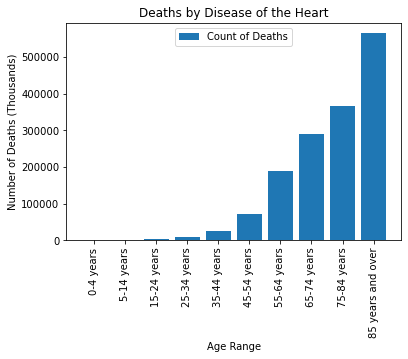

In [40]:
create_bar_chart("Number of Deaths from Diseases of heart","Number of Deaths (Thousands)", "Deaths by Disease of the Heart")

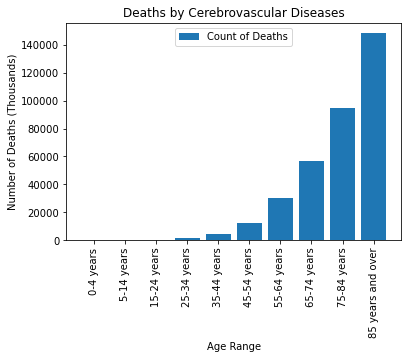

In [41]:
create_bar_chart("Number of Deaths from Cerebrovascular diseases","Number of Deaths (Thousands)", "Deaths by Cerebrovascular Diseases")

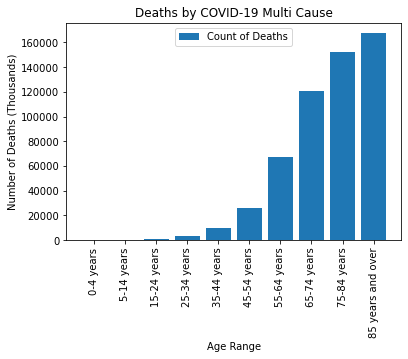

In [42]:
create_bar_chart("Number of Deaths from COVID-19 (Multiple Causes of Death)","Number of Deaths (Thousands)", "Deaths by COVID-19 Multi Cause")

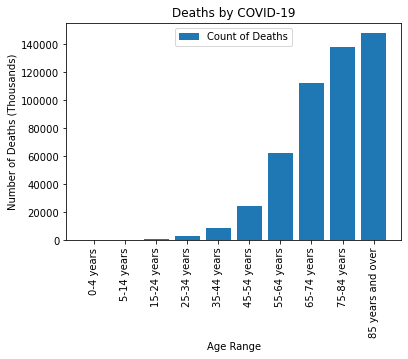

In [43]:
create_bar_chart("Number of Deaths from COVID-19 (Underlying Causes of Death)","Number of Deaths (Thousands)", "Deaths by COVID-19")